# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [203]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


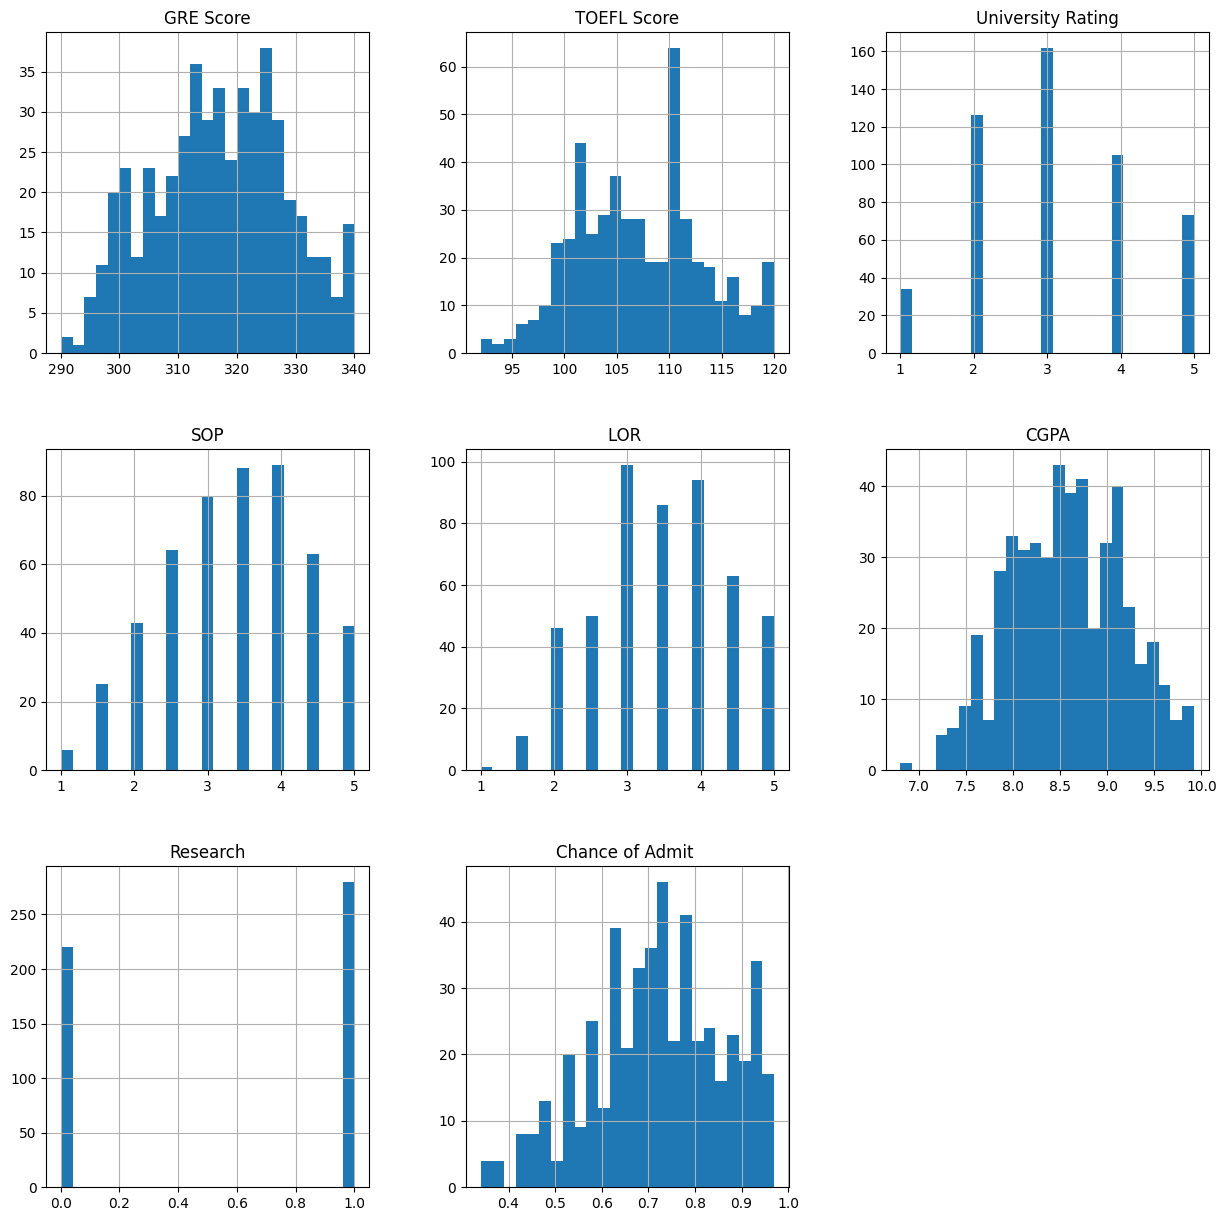

In [204]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [205]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
# Y = data[data.columns[-1]]

Y = pd.DataFrame(data, columns=[data.columns[-1]])

In [206]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.15 ,random_state=42)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [207]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [208]:
Y_train.shape

(425, 1)

In [209]:
X_train.shape

(425, 7)

In [210]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [211]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [212]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [213]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model1 = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model1.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [214]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss='mean_squared_error')

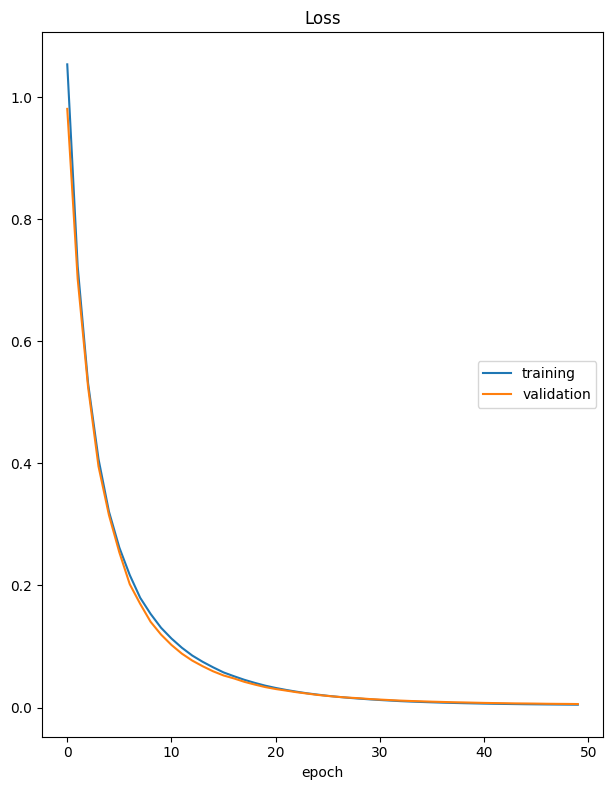

Loss
	training         	 (min:    0.005, max:    1.054, cur:    0.005)
	validation       	 (min:    0.006, max:    0.981, cur:    0.006)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0057


In [215]:
# Entrenamiento de la red neuronal con 50 épocas
model1.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [216]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model2.add(Dense(256, input_shape=(dims,), activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(output_var))
model2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [217]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
from keras.optimizers import Adam
model2.compile(optimizer='sgd', loss='mean_squared_error')

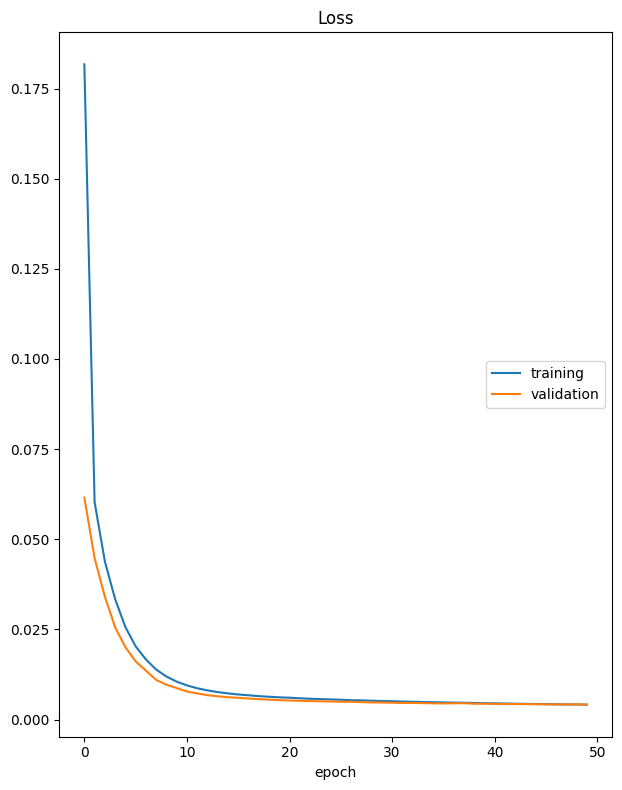

Loss
	training         	 (min:    0.004, max:    0.182, cur:    0.004)
	validation       	 (min:    0.004, max:    0.062, cur:    0.004)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042 - val_loss: 0.0042


In [218]:
# Entrenamiento de la red neuronal con 50 épocas
model2.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [219]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(256, input_shape=(dims,), activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(output_var))
model3.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [220]:
# Celda 3
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
best_model = ModelCheckpoint('my_model.keras', verbose=0, save_best_only=True)

In [221]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model3.compile(optimizer='sgd', loss='mean_squared_error')

In [222]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model3.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4903 - val_loss: 0.4248
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4400 - val_loss: 0.3788
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3904 - val_loss: 0.3445
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3321 - val_loss: 0.2042
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1834 - val_loss: 0.1028
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0985 - val_loss: 0.0658
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0699 - val_loss: 0.0505
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0548 - val_loss: 0.0432
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0482 - val_loss: 0.0385
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0420 - val_loss: 0.0348
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - val_loss: 0.0319
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0363 - val_lo

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Model: 1 - Una capa 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 0.005730397378507481
Mean Absolute Error (MAE): 0.05513127363522848
Mean Absolute Percentage Error (MAPE): 8.882381924760608
R^2 Score: 0.7457132885814135

Model: 2 - Multicapa 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 0.004170676741114364
Mean Absolute Error (MAE): 0.05004564558664959
Mean Absolute Percentage Error (MAPE): 8.02068514204366
R^2 Score: 0.8149259810732035

Model: 3 - Multicapa - Early Stopping + Model Checkpoint
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 0.005616076664669498
Mean Absolute Error (MAE): 0.05474433418909709
Mean Absolute Percentage Error (MAPE): 8.963112710606042
R^2 Score: 0.7507862767964922



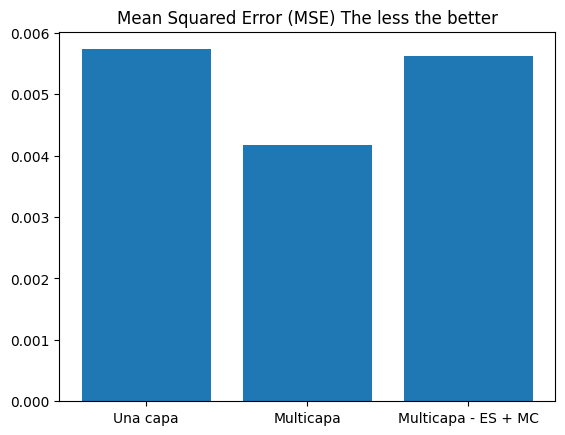

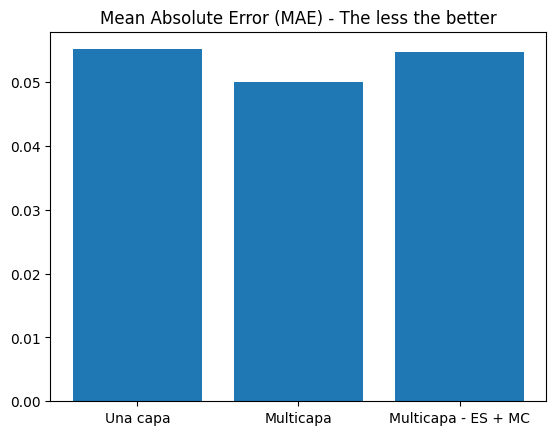

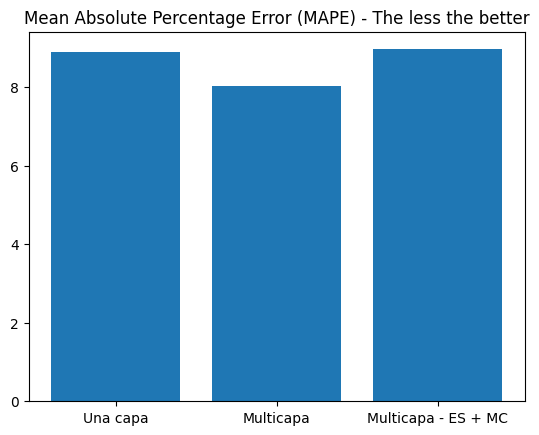

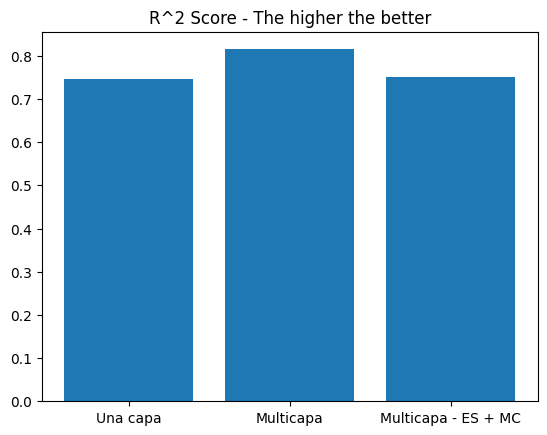

In [225]:
# Celda 4

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = [model1, model2, model3]

statistics = []


for idx, model in enumerate(models):
    print(f"Model: {idx+1} - {'Una capa' if idx == 0 else 'Multicapa'} {'- Early Stopping + Model Checkpoint' if idx == 2 else ''}")
    Y_pred = model.predict(X_test)
    print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test, Y_pred))
    print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((Y_test - Y_pred)/Y_test))*100)
    print("R^2 Score:", r2_score(Y_test, Y_pred))
    print()

    statistics.append(
        {
            "mse": mean_squared_error(Y_test, Y_pred),
            "mae": mean_absolute_error(Y_test, Y_pred),
            "mape": np.mean(np.abs((Y_test - Y_pred)/Y_test))*100,
            "score": r2_score(Y_test, Y_pred),
        }
    )

MODEL1_NAME = "Una capa"
MODEL2_NAME = "Multicapa"
MODEL3_NAME = "Multicapa - ES + MC"

fig, ax = plt.subplots()
ax.set_title("Mean Squared Error (MSE) The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mse"], statistics[1]["mse"], statistics[2]["mse"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("Mean Absolute Error (MAE) - The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mae"], statistics[1]["mae"], statistics[2]["mae"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("Mean Absolute Percentage Error (MAPE) - The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mape"], statistics[1]["mape"], statistics[2]["mape"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("R^2 Score - The higher the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["score"], statistics[1]["score"], statistics[2]["score"]])
plt.show()